<a href="https://colab.research.google.com/github/Krieg2065/Python/blob/main/ELSHERBINI_M_GTL_Job_Placement_Classification_(FINAL_LAB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Final Code Lab: Job Hiring Prediction

Ciao students! I hope you all have learned a lot these last 3 weeks and have found the lessons/labs interesting.  

In this final lab, you will build a KNN and Decision Tree model to predict whether or not a job applicant wil get hired based on thier application details (like amount of schooling, test scores, and work experience). 

Feel free to reference any of our past labs. Try to get as best accuracy as you can! But don't worry if the model is not too "good" (less than 80% accuracy). We care more about your understanding!!

**Good luck!!!**

In [1]:
print("GOAL: Predict whether a job applicant will get hired/placed (status) !") 

GOAL: Predict whether a job applicant will get hired/placed (status) !


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

##### TODO: import both the KNN and decision tree models from sklearn here!
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 

In [4]:
##### TODO: Use the data_url to import the data into dataset using read_csv()!
data_url = 'https://raw.githubusercontent.com/pforderique/www.pforderique.com/main/server/data/datasets/hiring_dataset.csv'
dataset = pd.read_csv(data_url)

print(f'Dataset contains {len(dataset)} total rows.')
print(f'Features are: {dataset.columns}')

##### TODO: print the first few rows of dataset
dataset.head()

Dataset contains 215 total rows.
Features are: Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'degree_percentage', 'work_experience', 'emp_test_percentage',
       'mba_percent', 'status'],
      dtype='object')


,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,degree_percentage,work_experience,emp_test_percentage,mba_percent,status
0,M,67.00,Others,91.00,Others,58.00,No,55.0,58.80,Placed
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,66.28,Placed
2,M,65.00,Central,68.00,Central,64.00,No,75.0,57.80,Placed
3,M,56.00,Central,52.00,Central,52.00,No,66.0,59.43,Not Placed
4,M,85.80,Central,73.60,Central,73.30,No,96.8,55.50,Placed


## Preprocessing: Clean the Data 

Clean this dataset by replacing categorical data (gender, ssc_board, hsc_board, and work experience) with numerical data (0, 1, 2, ...).  

**gender:** takes on 2 values - 'M' or 'F'  
**ssc_board:** takes on 2 values - 'Central' or 'Others'  
**hsc_board:** takes on 2 values - 'Central' or 'Others'  
**work_experience:** takes on 2 values - 'Yes' or 'No'

#### **Hint**  
Use panda dataframe's ```replace()``` function from previous labs like the Titanic. Make sure to include the parameter ```inplace=True``` !

In [7]:
#### TODO: replace all categorical data with numerical data
# replace gender
dataset.replace(to_replace = "M", value = 1,inplace=True)
dataset.replace(to_replace = "F", value = 0,inplace=True)
# replace ssc_board
# replace hsc_board
dataset.replace(to_replace = "Central", value = 1,inplace=True)
dataset.replace(to_replace = "Others", value = 0,inplace=True)
# replace work_experience
dataset.replace(to_replace = "Yes", value = 1,inplace=True)
dataset.replace(to_replace = "No", value = 0,inplace=True)


# then, print first 5 rows to make sure we succeeded
dataset.head(5)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,degree_percentage,work_experience,emp_test_percentage,mba_percent,status
0,1,67.00,0,91.00,0,58.00,0,55.0,58.80,Placed
1,1,79.33,1,78.33,0,77.48,1,86.5,66.28,Placed
2,1,65.00,1,68.00,1,64.00,0,75.0,57.80,Placed
3,1,56.00,1,52.00,1,52.00,0,66.0,59.43,Not Placed
4,1,85.80,1,73.60,1,73.30,0,96.8,55.50,Placed


### Checking for outliers and imbalanced data

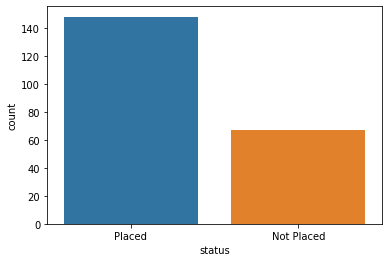

In [8]:
##### TODO: plot the target column to see how balanced the data is for each category
# hint: which column are we trying to predict?
sns.countplot(x='status', data=dataset)

### Plotting a graph of the data

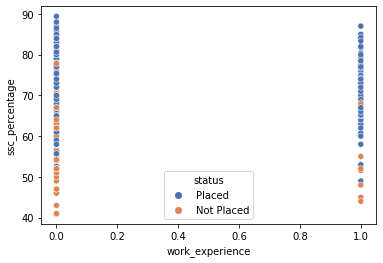

In [28]:
##### TODO: select 2 features you think could be important and plot a 2D graph of the data
sns.scatterplot(x='work_experience', y='ssc_percentage', data=dataset, hue='status', palette="deep")

### Separating features and target

In [45]:
### TODO: split data into X and y

# X variable contains only the features (no target value)
# Y variable contains only target value (no features)

# X variable contains features
# Y variable contains target value
X = dataset.drop(['status'], axis=1)
y = dataset['status']

### Split the dataset into train and test sets

In [51]:
##### TODO: use an 80, 20 training/testing split

testing_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testing_size)

## Building a KNN Classifier

### Initial model

In [54]:
##### TODO: Create Initial nearest neighbor model with a random K,
### then train the model,
### then print the accuracy
K = 3
model =  KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Score is :" , accuracy)

Accuracy Score is : 0.9534883720930233


### Finding a good K value

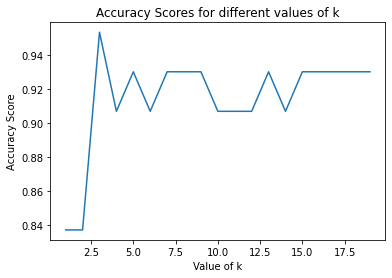

In [53]:
##### TODO: find the best K value

# checking accuracy score for k-value ranging from 1 to 30
k_range = list(range(1, 20))
scores = []

# model fitting and calculating accuracy score
# for each k-value in the range 1-30
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k) # Create and train using this k
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    scores.append(accuracy) # find the accuracy
    pass

# plot accuracies for each k value
plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

### Accuracy for optimal K

In [55]:
##### TODO: choose the optimal k-value for this dataset based on the graph above,
### then create nearest neighbor model with a optimal K,
### then train the model,
### then print the accuracy
optimal_K = 3
model =  KNeighborsClassifier(n_neighbors=optimal_K)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Score is :" , accuracy)

Accuracy Score is : 0.9534883720930233


### Predicting class of new data

In [73]:
##### TODO: use ALL of the data (X and y, instead of X_train and y_train)
### to train the model this time
model =  KNeighborsClassifier(n_neighbors=optimal_K)
model.fit(X, y)

# create your own new data to be classified
# remember it needs to have as many inputs as there are features
X_new = np.array([[1,	67.00,	1,	91.00,	1,	58.00,	1,	0.00,	0.00]])
prediction = model.predict(X_new) ##### TODO: call predict() to make a prediction!

print('prediction:', prediction)

prediction: ['Not Placed']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Building a Decision Tree Classifier

In [74]:
##### TODO: Build Initial Decision Tree model, using `entropy` criterion and 
### max_depth of 1. Then print the accuracy of this model.
model= DecisionTreeClassifier(criterion='entropy', max_depth=None)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Score is :" , accuracy)

Accuracy Score is : 0.8837209302325582


### Visualizing the Tree

Final Decision Tree
x[0] = gender
x[1] = ssc_percentage
x[2] = ssc_board
x[3] = hsc_percentage
x[4] = hsc_board
x[5] = degree_percentage
x[6] = work_experience
x[7] = emp_test_percentage
x[8] = mba_percent


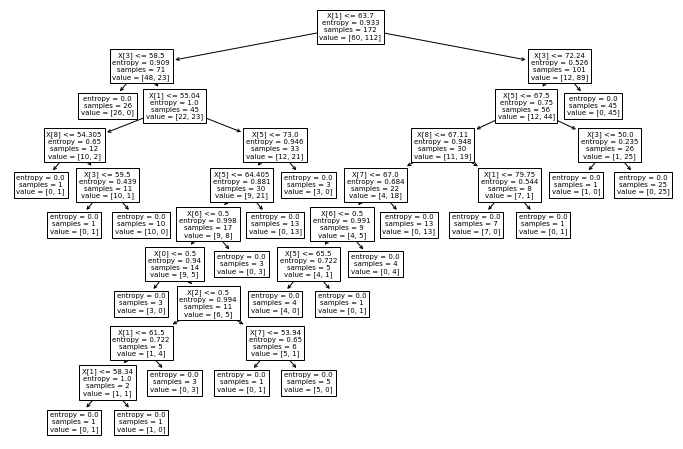

In [75]:
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(model)
print("Final Decision Tree")

for idx, feature in enumerate(X.columns):
  print(f'x[{idx}] = {feature}')

### Can we do better?

Rerun the last two cells with different parameters for the max_depth value. Can you achieve a model with better accuracy?

For example, try
```max_depth=3``` or ```max_depth=5``` or ```max_depth=None```

Notice how the visualization of the tree changes as you allow for more or fewer levels in the tree!

In [67]:
##### TODO: use ALL of the data (X and y, instead of X_train and y_train)
### to train the model this time
model= DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(X, y)


# create your own new data to be classified
# remember it needs to have as many inputs as there are features
X_new = np.array([[0,	67.00,	1,	91.00,	1,	58.00,	1,	55.00,	58.80]])
prediction = model.predict(X_new) ##### TODO: call predict() to make a prediction!

print('prediction:', prediction)
print("Accuracy Score is :" , accuracy)

prediction: ['Placed']
Accuracy Score is : 0.813953488372093


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


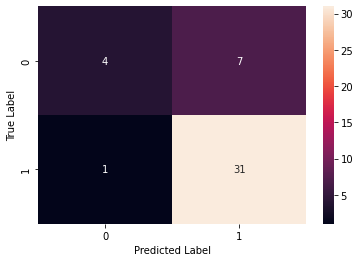

In [33]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot = True, fmt = "d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred) #2 * (recal * precision) / (recal + precision)
        
print(class_report)

              precision    recall  f1-score   support

  Not Placed       0.80      0.36      0.50        11
      Placed       0.82      0.97      0.89        32

    accuracy                           0.81        43
   macro avg       0.81      0.67      0.69        43
weighted avg       0.81      0.81      0.79        43

